In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
mnist = tf.keras.datasets.mnist

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [72]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [73]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [75]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9200 - loss: 0.2680
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9815 - loss: 0.0650
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9867 - loss: 0.0444


In [67]:
model.save('handwritten_digit.keras')


In [76]:
model = tf.keras.models.load_model('handwritten_digit.keras')

In [77]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9852 - loss: 0.0520


In [78]:
print(loss)
print(accuracy)

0.03903007134795189
0.9879000186920166


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The digit is a 1


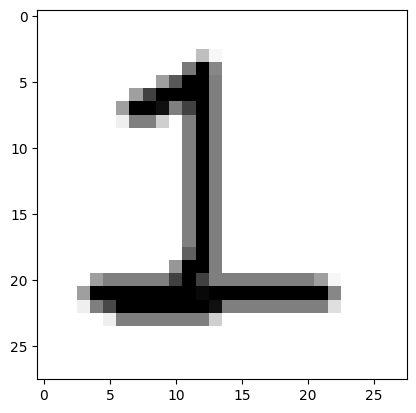

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The digit is a 2


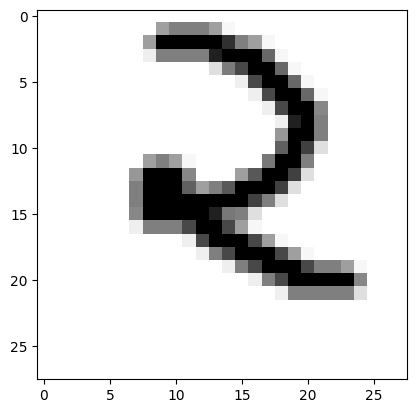

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The digit is a 3


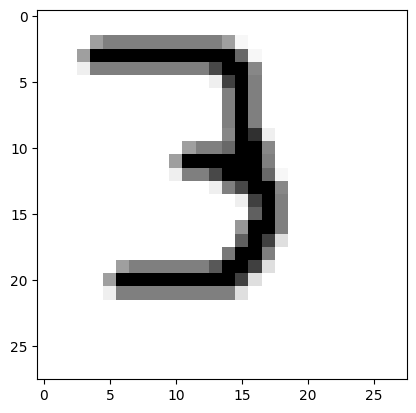

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The digit is a 4


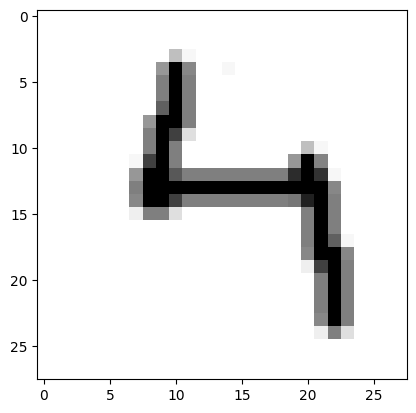

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The digit is a 5


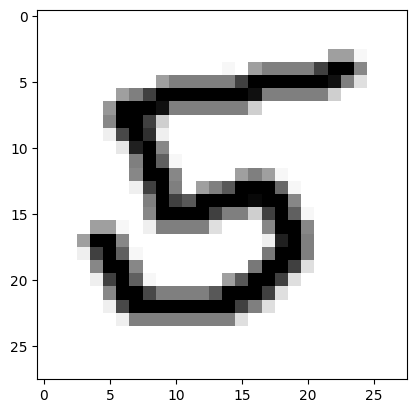

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The digit is a 6


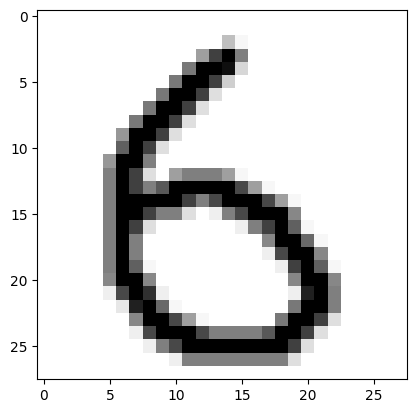

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The digit is a 7


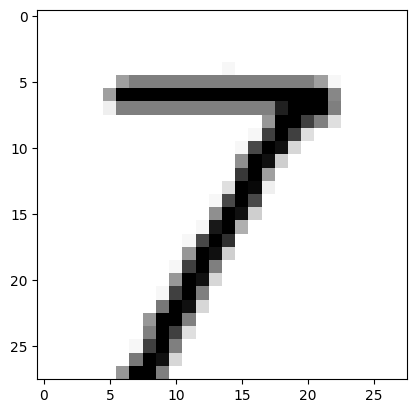

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The digit is a 8


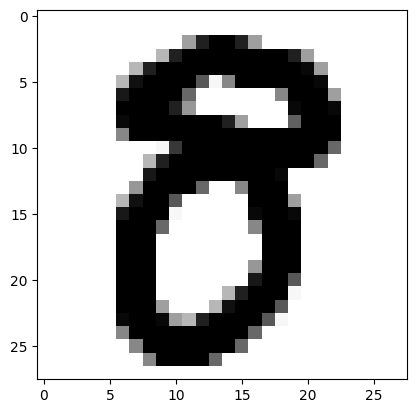

In [80]:
image_number = 1
base ='/content/drive/MyDrive/handwritten_digit/digit'
while os.path.isfile(f"{base}/dig{image_number}.png"):
  try:
    img = cv2.imread(f"{base}/dig{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The digit is a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
  except:
    print("ERROR")
  finally:
    image_number+=1